In [1]:
# test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-28,15:18].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-28,15:25].pkl"
# undersampling_interval = 10

# test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-29,09:47].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-29,10:58].pkl"
# undersampling_interval = 1


# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_[2022-11-29,11:02].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_continuous_[2022-11-29,14:56].pkl"
# undersampling_interval = 1

# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_[2022-11-29,15:56].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_continuous_[2022-11-29,16:19].pkl"
# undersampling_interval = 10


# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_mock_[2022-12-02,08:57].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,09:17].pkl"
# undersampling_interval = 8


# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,10:13].pkl"
# undersampling_interval = 10

###### Everything above here doesn't have participant indices recorded!



test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_CorreiaNet_continuous_[2022-12-06,10:21].pkl"
undersampling_interval = 10





# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_EEGNet_continuous_[2022-12-06,10:47].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_20Ensemble_EEGNet_continuous_[2022-12-06,11:46].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_BayesianEEGNet_continuous_[2022-12-06,11:54].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_BayesianCorreiaNet_continuous_[2022-12-06,12:24].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_UnbalancedBayesianCorreiaNet_continuous_[2022-12-06,13:03].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Unbalanced20EnsembleEEGNet_continuous_[2022-12-06,15:17].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Balanced20EnsembleCorreiaNet_continuous_[2022-12-06,19:55].pkl"
# undersampling_interval = 10



test_metrics_path_continuous = "BCI_root/Results/metrics_NoStrideCorreiaNetEnsemble_continuous_[2022-12-07,11:37].pkl"
undersampling_interval = 10




test_metrics_path_continuous = "BCI_root/Results/metrics_Proper_EEGNet_continuous_[2022-12-07,12:13].pkl"
undersampling_interval = 10



test_metrics_path_continuous = "BCI_root/Results/metrics_5ensembleProper_EEGNet_continuous_[2022-12-07,12:37].pkl"
undersampling_interval = 10

test_metrics_path_continuous = "BCI_root/Results/metrics_CrossEntropy5ensembleProper_EEGNet_continuous_[2022-12-07,14:52].pkl"
undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_400ms5ensembleCorreiaNet_continuous_[2022-12-07,16:39].pkl"
# undersampling_interval = 10

test_metrics_path_continuous = "BCI_root/Results/metrics_600ms5ensembleCorreiaNet_continuous_[2022-12-07,16:52].pkl"
undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl"
# undersampling_interval = 10



test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_continuous_[2022-12-08,15:41].pkl"
undersampling_interval = 10


In [2]:
from src.data.util import open_file_pickle
import torch
import numpy as np
from src.util.util import milliseconds_to_samples, samples_to_milliseconds
import matplotlib.pyplot as plt
from tqdm import tqdm
from dataclasses import fields
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

/Users/ivopascal/.local/share/virtualenvs/Error-perception-classification-in-BCI-usi-IO2CUxHQ/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# test_metrics = open_file_pickle(test_metrics_path)
test_metrics_continuous = open_file_pickle(test_metrics_path_continuous)

In [4]:
len(test_metrics_continuous.y_predicted)

560924

In [5]:
test_metrics_continuous.y_subj_idx.shape

torch.Size([560924])

In [6]:
test_metrics_continuous.y_predicted

tensor([7.0301e-04, 2.9689e-01, 5.5472e-01,  ..., 9.3302e-01, 8.2100e-01,
        5.3393e-01], dtype=torch.float64)

In [7]:
test_metrics_continuous.y_variance.shape

torch.Size([560924])

In [8]:
for i in range(1, 7):
    print((test_metrics_continuous.y_subj_idx == i).sum())
print(test_metrics_continuous.y_in_distribution.sum())
print(test_metrics_continuous.y_predicted.shape)

tensor(93317)
tensor(95212)
tensor(93828)
tensor(92394)
tensor(93112)
tensor(93061)
tensor(538)
torch.Size([560924])


In [9]:
continues_true_rate = 1

if continues_true_rate > 1:
    test_metrics_continuous.y_predicted = test_metrics_continuous.y_predicted.reshape(-1, continues_true_rate).max(axis=1).values
    test_metrics_continuous.y_true = test_metrics_continuous.y_true.reshape(-1, continues_true_rate).min(axis=1).values
    test_metrics_continuous.y_in_distribution = test_metrics_continuous.y_in_distribution.reshape(-1, continues_true_rate).max(axis=1).values
    test_metrics_continuous.y_subj_idx = test_metrics_continuous.y_subj_idx.reshape(-1, continues_true_rate)[:, 0]
    test_metrics_continuous.y_variance = test_metrics_continuous.y_variance.reshape(-1, continues_true_rate).mean(axis=1)



In [10]:
print(test_metrics_continuous.y_in_distribution.sum())
print(test_metrics_continuous.y_predicted.shape)

tensor(538)
torch.Size([560924])


In [11]:
test_metrics_continuous.y_in_distribution = test_metrics_continuous.y_in_distribution.type('torch.BoolTensor')

In [12]:
for i in range(1, 7):
    print((test_metrics_continuous.y_subj_idx == i).sum())


tensor(93317)
tensor(95212)
tensor(93828)
tensor(92394)
tensor(93112)
tensor(93061)


In [13]:
[field.name for field in fields(test_metrics_continuous)]

['y_true',
 'y_predicted',
 'y_variance',
 'y_in_distribution',
 'y_subj_idx',
 'y_true_matrix',
 'y_predicted_matrix',
 'statscores',
 'precision',
 'recall',
 'negative_predictive_value',
 'accuracy_conf_matrix',
 'f1_score',
 'mcc',
 'n_mcc']

In [14]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5).numpy().mean()

0.7638646233714371

In [15]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5)[test_metrics_continuous.y_in_distribution].numpy().mean()

0.7881040892193308

In [16]:
event_indices = np.where(test_metrics_continuous.y_in_distribution.numpy())

In [17]:
event_indices

(array([   588,   3160,   3560,   3694,   5104,   5762,   6016,   6694,
          9665,   9811,  10331,  10443,  10581,  10789,  11043,  11799,
         11937,  13115,  13723,  15317,  15717,  20672,  22196,  23024,
         23716,  24972,  26180,  30408,  30640,  31002,  31278,  31548,
         32660,  33084,  34670,  38795,  38945,  39319,  41963,  42363,
         43233,  44697,  47355,  48741,  49131,  49373,  49603,  50027,
         50447,  50979,  53385,  53923,  54047,  57052,  58964,  59192,
         60300,  60704,  61040,  61162,  61378,  62202,  63242,  64004,
         64274,  67054,  67184,  67854,  68404,  68544,  68786,  69780,
         71774,  72336,  73098,  73378,  77758,  77900,  78032,  78860,
         84797,  84937,  85059,  86003,  86835,  87185,  88933,  90425,
         90553,  96306,  96434,  97546,  97680,  97804,  98092,  98486,
         99494, 104233, 104471, 104849, 105835, 105957, 106685, 107063,
        108705, 109061, 109167, 110577, 112953, 113065, 113177, 

In [18]:
y_true_id = 1 - test_metrics_continuous.y_true.clone().double()
y_true_id[~test_metrics_continuous.y_in_distribution] = 0.5

In [19]:
y_true_id[test_metrics_continuous.y_in_distribution].mean()

tensor(0.1970, dtype=torch.float64)

In [20]:
(~test_metrics_continuous.y_in_distribution).sum()

tensor(560386)

In [21]:
test_metrics_continuous.y_true.shape

torch.Size([560924])

tensor(0)


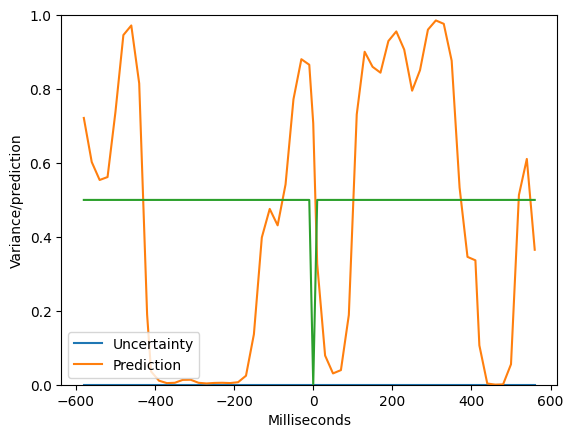

tensor(0)


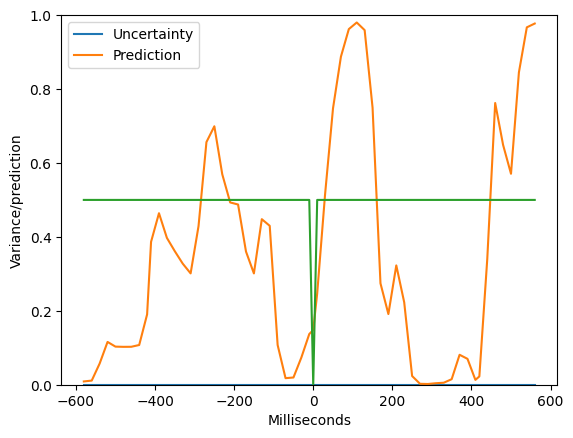

tensor(1)


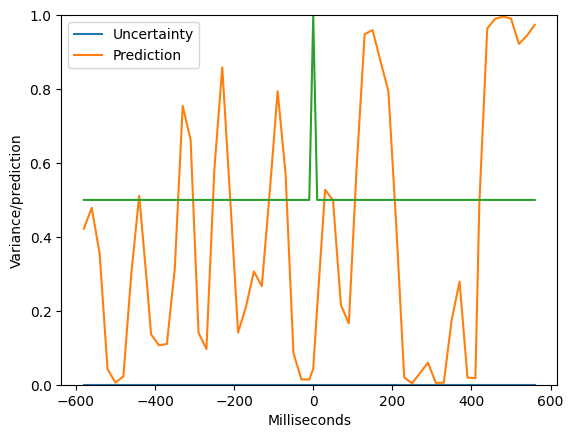

tensor(0)


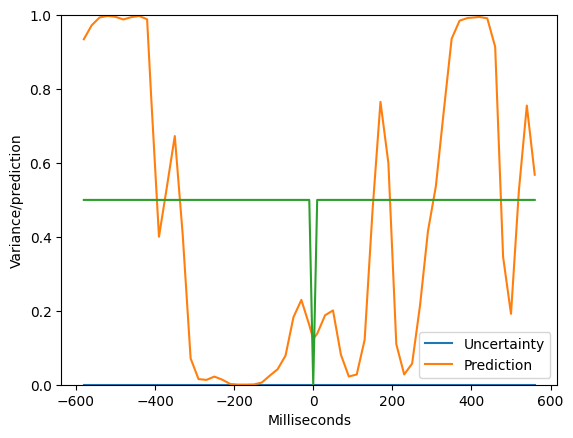

tensor(0)


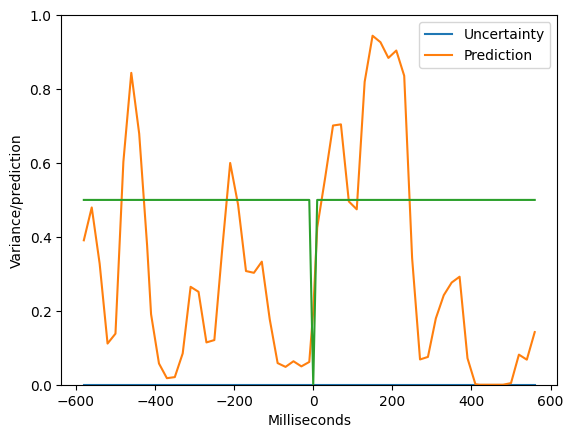

In [22]:
lower_window_ms = -600
upper_window_ms = 600
lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling_interval )
upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling_interval )
event_index = 1


x = [samples_to_milliseconds(step) * undersampling_interval for step in range(lower_window, upper_window)]

# for event_index in range(len(event_indices[0])):
for event_index in range(5):
    y_true = 1 - (test_metrics_continuous.y_true[event_indices[0][event_index]])
    print(y_true)
    
    # if y_true:
    #     continue

    color = "green" if y_true else "red"

    plt.plot(x, test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Uncertainty")
    plt.plot(x, 1 - test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Prediction")

    plt.xlabel("Milliseconds")
    plt.ylabel("Variance/prediction")
    plt.legend()
    # plt.vlines([-50, 0, 50], ymin=0, ymax=1, color=[color])
    plt.plot(x, y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Truth")
    plt.ylim(0, 1)

    plt.show()

In [23]:
event_indices

(array([   588,   3160,   3560,   3694,   5104,   5762,   6016,   6694,
          9665,   9811,  10331,  10443,  10581,  10789,  11043,  11799,
         11937,  13115,  13723,  15317,  15717,  20672,  22196,  23024,
         23716,  24972,  26180,  30408,  30640,  31002,  31278,  31548,
         32660,  33084,  34670,  38795,  38945,  39319,  41963,  42363,
         43233,  44697,  47355,  48741,  49131,  49373,  49603,  50027,
         50447,  50979,  53385,  53923,  54047,  57052,  58964,  59192,
         60300,  60704,  61040,  61162,  61378,  62202,  63242,  64004,
         64274,  67054,  67184,  67854,  68404,  68544,  68786,  69780,
         71774,  72336,  73098,  73378,  77758,  77900,  78032,  78860,
         84797,  84937,  85059,  86003,  86835,  87185,  88933,  90425,
         90553,  96306,  96434,  97546,  97680,  97804,  98092,  98486,
         99494, 104233, 104471, 104849, 105835, 105957, 106685, 107063,
        108705, 109061, 109167, 110577, 112953, 113065, 113177, 

In [24]:
test_metrics_continuous.y_variance[~test_metrics_continuous.y_in_distribution].mean()

tensor(0., dtype=torch.float64)

In [25]:
test_metrics_continuous.y_variance[test_metrics_continuous.y_in_distribution].mean()

tensor(0., dtype=torch.float64)

In [26]:
def make_average_around_event(metrics, lower_window_ms, upper_window_ms, undersampling=undersampling_interval, y_to_plot=None, label_prefix=""):
    undersampling = undersampling * continues_true_rate

    lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling )
    upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling )


    x = [samples_to_milliseconds(step) * undersampling for step in range(lower_window, upper_window)]

    y_true_id = 1 - metrics.y_true.clone().double()
    y_true_id[~metrics.y_in_distribution] = 0.5
    
    event_indices = np.where(metrics.y_in_distribution.numpy())

    y_variances = []
    y_predictions = []
    y_trues = []
    y_subj = []
    for event_index in range(len(event_indices[0])):
        y_true = 1 - (metrics.y_true[event_indices[0][event_index]])
        # print(y_true)

        if y_to_plot != None and y_to_plot != y_true:
            continue

        color = "green" if y_true else "red"

        y_subj.append(metrics.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_variances.append(metrics.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_predictions.append(1 - metrics.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])

    
    
    stacked_subjects = torch.vstack(y_subj)
    stacked_variances = torch.vstack(y_variances)
    stacked_predictions = torch.vstack(y_predictions)
    stacked_trues = torch.vstack(y_trues)

    predictions_per_participant = []
    variances_per_participant = []
    trues_per_participant = []

    for i in range(1, 7):
        predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))

    avg_variances = torch.vstack(variances_per_participant).mean(axis=0)
    std_variances = torch.vstack(variances_per_participant).std(axis=0)

    avg_predictions = torch.vstack(predictions_per_participant).mean(axis=0)
    std_predictions = torch.vstack(predictions_per_participant).std(axis=0)

    avg_trues = torch.vstack(trues_per_participant).mean(axis=0)
    std_trues = torch.vstack(trues_per_participant).std(axis=0)



    plt.plot(x, avg_variances, label=f"{label_prefix}Uncertainty")
    plt.fill_between(x, avg_variances - std_variances, avg_variances + std_variances , label=f"_{label_prefix}Variances", alpha=0.1)


    plt.plot(x, avg_predictions, label=f"{label_prefix}Predictions")
    plt.fill_between(x, avg_predictions - std_predictions, avg_predictions + std_predictions , label=f"_{label_prefix}Predictions", alpha=0.1)

    plt.plot(x, avg_trues, label=f"{label_prefix}Truths")
    plt.fill_between(x, avg_trues - std_trues, avg_trues + std_trues , label=f"_{label_prefix}Truths", alpha=0.1)

    # plt.legend()
    plt.xlabel("Time (ms)")
    plt.ylabel("Variance / prediction")
    plt.ylim(0, 1)
    # plt.show()

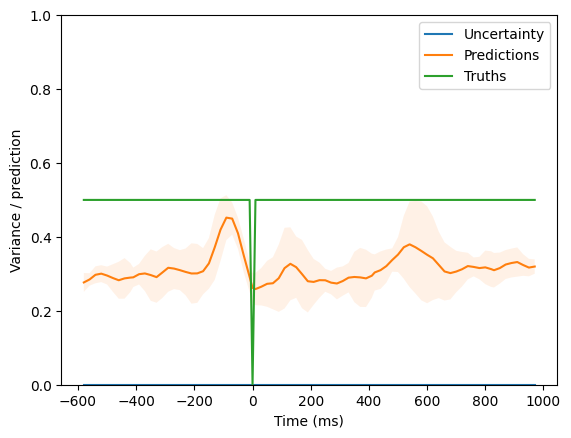

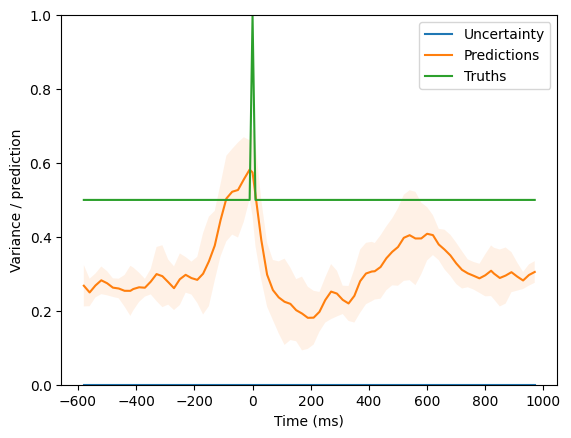

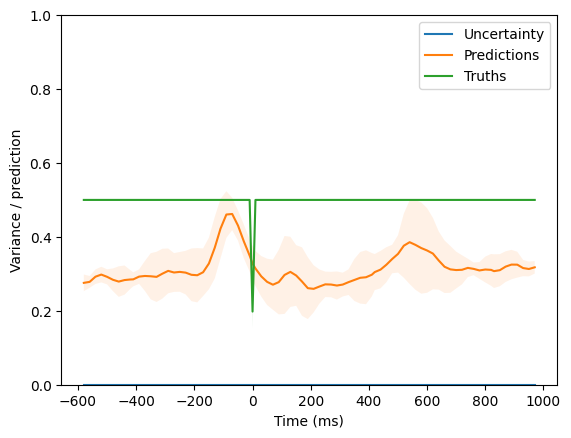

In [27]:
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 0)
plt.legend()
plt.show()
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 1)
plt.legend()
plt.show()
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = None)
plt.legend()
plt.show()



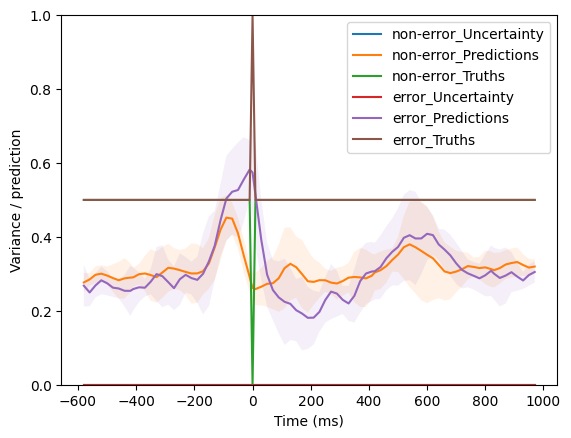

In [28]:
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 0, label_prefix="non-error_")
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 1, label_prefix="error_")
plt.legend()
plt.show()

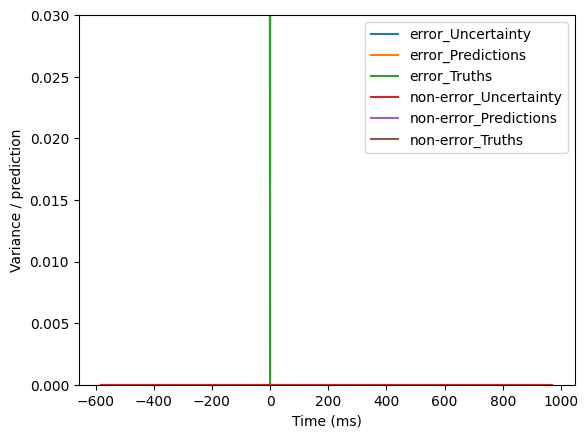

In [29]:
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 0, label_prefix="error_")
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 1,label_prefix="non-error_")
plt.legend()
plt.ylim(0.0, 0.03)
plt.show()

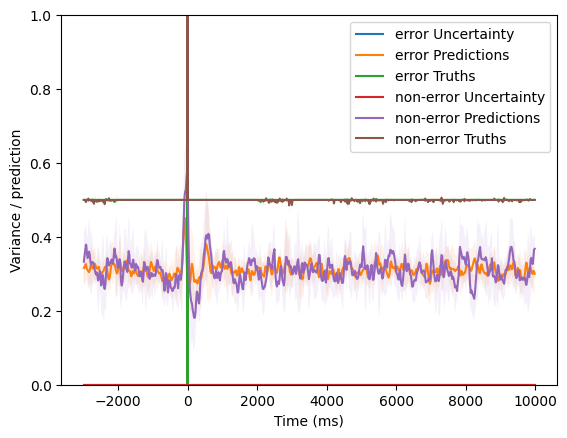

In [30]:
make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 0, label_prefix="error ")
make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 1, label_prefix="non-error ")
plt.legend()
plt.show()

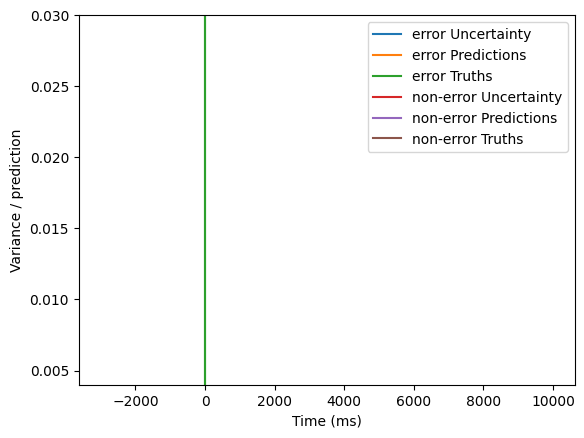

In [31]:
make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 0, label_prefix="error ")
make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 1, label_prefix="non-error ")
plt.legend()
plt.ylim(0.004, 0.03)
plt.show()

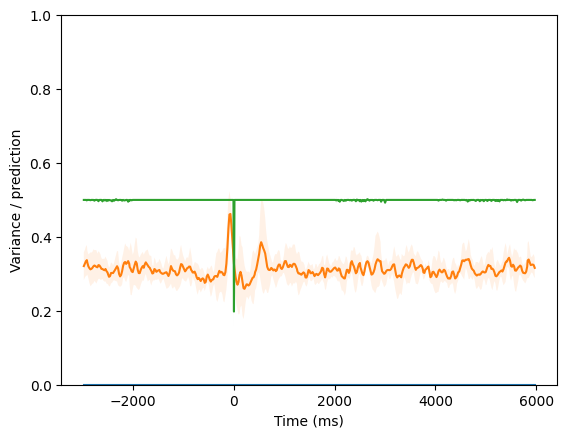

In [32]:
make_average_around_event(test_metrics_continuous, -3000, 6000, y_to_plot = None)

In [33]:

y_variances = []
y_predictions = []
y_trues = []
y_subj = []
for event_index in range(len(event_indices[0])):
    y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])

    color = "green" if y_true else "red"

    y_variances.append(test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_predictions.append(test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_subj.append(test_metrics_continuous.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    
    y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])


In [34]:


stacked_subjects = torch.vstack(y_subj)
stacked_variances = torch.vstack(y_variances)
stacked_predictions = torch.vstack(y_predictions)
stacked_trues = torch.vstack(y_trues)

predictions_per_participant = []
variances_per_participant = []
trues_per_participant = []

for i in range(1, 7):
    predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))
    variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))
    trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))

In [35]:
predictions_per_participant[0].reshape(-1).shape

torch.Size([5040])

In [36]:
predictions_per_participant = []
variances_per_participant = []
trues_per_participant = []
y_in_distribution_per_participant  = []

for i in range(1, 7):
    predictions_per_participant.append(test_metrics_continuous.y_predicted[test_metrics_continuous.y_subj_idx == i])
    variances_per_participant.append(test_metrics_continuous.y_variance[test_metrics_continuous.y_subj_idx == i])
    trues_per_participant.append(test_metrics_continuous.y_true[test_metrics_continuous.y_subj_idx == i])
    y_in_distribution_per_participant.append(test_metrics_continuous.y_in_distribution[test_metrics_continuous.y_subj_idx == i])

In [37]:
predictions_per_participant[1].shape

torch.Size([95212])

0.9997428121349807
Best Threshold=0.561729, G-Mean=0.801
              precision    recall  f1-score   support

           0       0.00      0.79      0.00        24
           1       1.00      0.72      0.83     93293

    accuracy                           0.72     93317
   macro avg       0.50      0.75      0.42     93317
weighted avg       1.00      0.72      0.83     93317



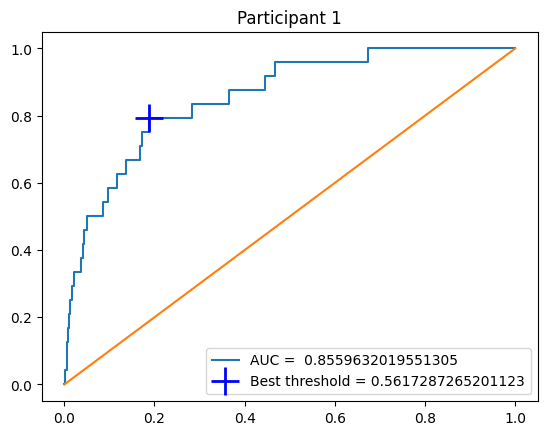

0.9998004453220183
Best Threshold=0.557050, G-Mean=0.785
              precision    recall  f1-score   support

           0       0.00      0.74      0.00        19
           1       1.00      0.75      0.86     95193

    accuracy                           0.75     95212
   macro avg       0.50      0.74      0.43     95212
weighted avg       1.00      0.75      0.86     95212



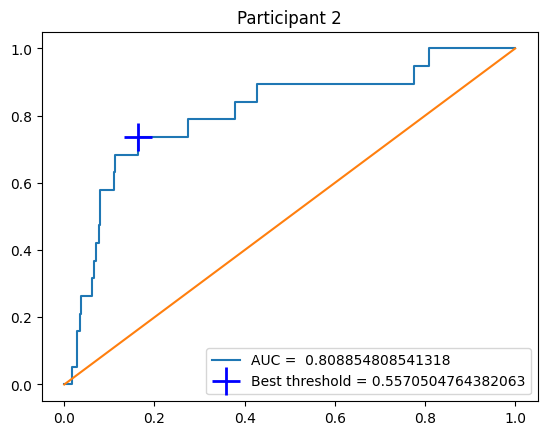

0.9998294752099587
Best Threshold=0.541309, G-Mean=0.809
              precision    recall  f1-score   support

           0       0.00      0.81      0.00        16
           1       1.00      0.74      0.85     93812

    accuracy                           0.74     93828
   macro avg       0.50      0.78      0.43     93828
weighted avg       1.00      0.74      0.85     93828



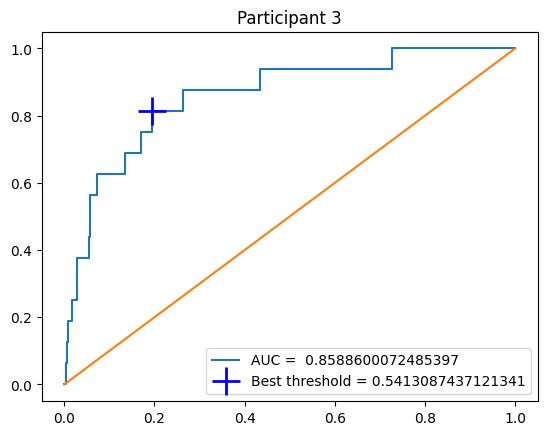

0.9998484750091997
Best Threshold=0.270810, G-Mean=0.691
              precision    recall  f1-score   support

           0       0.00      0.29      0.00        14
           1       1.00      0.94      0.97     92380

    accuracy                           0.94     92394
   macro avg       0.50      0.61      0.49     92394
weighted avg       1.00      0.94      0.97     92394



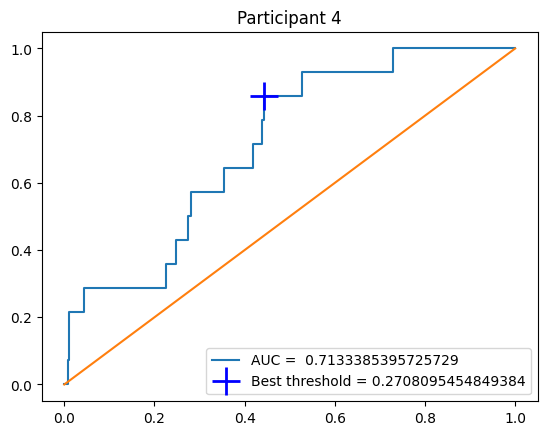

0.9998496434401581
Best Threshold=0.261734, G-Mean=0.651
              precision    recall  f1-score   support

           0       0.00      0.29      0.00        14
           1       1.00      0.92      0.96     93098

    accuracy                           0.92     93112
   macro avg       0.50      0.60      0.48     93112
weighted avg       1.00      0.92      0.96     93112



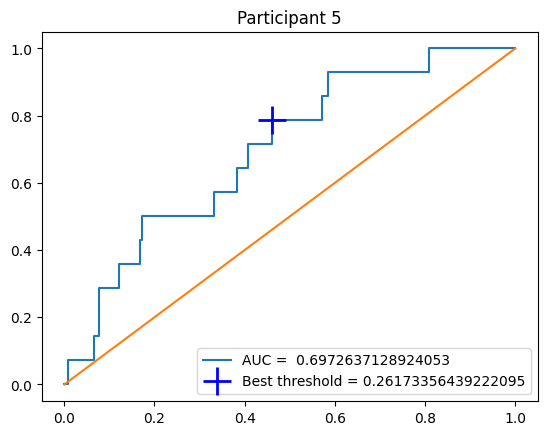

0.9997958328408248
Best Threshold=0.468183, G-Mean=0.613
              precision    recall  f1-score   support

           0       0.00      0.42      0.00        19
           1       1.00      0.68      0.81     93042

    accuracy                           0.68     93061
   macro avg       0.50      0.55      0.41     93061
weighted avg       1.00      0.68      0.81     93061



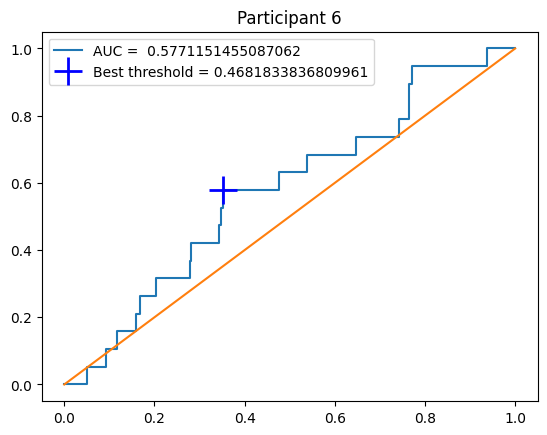

In [38]:
optimal_thresholds = []
interval_preds = []
interval_truths = []
for i, zipped in enumerate(zip(trues_per_participant, predictions_per_participant, y_in_distribution_per_participant)):
    participant_trues, participant_predictions, participan_in_distribution = zipped
    binarized_participant_trues = participant_trues.clone()
    print(binarized_participant_trues.numpy().mean())
    fpr, tpr, thresholds = roc_curve(1 - binarized_participant_trues.reshape(-1), 1 - participant_predictions.reshape(-1))
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    optimal_thresholds.append(thresholds[ix])
    
    
    thresholded_participant_predictions = participant_predictions > thresholds[ix]
    
    print(classification_report(binarized_participant_trues.reshape(-1), thresholded_participant_predictions.reshape(-1)))
    

    
    
    plt.plot(fpr, tpr, label=f"AUC =  {auc(fpr, tpr)}")
    plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
    plt.plot(fpr[ix], tpr[ix], 'b+', mew=2, ms=20, label=f"Best threshold = {thresholds[ix]}")
    plt.legend()
    plt.title(f"Participant {i +1}")
    plt.show()

In [39]:
all_id_truths = []
all_id_preds = []

all_truths = []
all_preds = []

for i, trues, predictions, y_in_distribution, threshold in zip(range(0, len(trues_per_participant)), trues_per_participant, predictions_per_participant, y_in_distribution_per_participant, optimal_thresholds):
    truths = trues[y_in_distribution] 
    preds = predictions[y_in_distribution] > threshold
        
    print(f"Participant {i+1}")    
    print(classification_report(truths.reshape(-1).numpy(), preds.reshape(-1).numpy()))
    all_id_truths.append(truths.reshape(-1))
    all_id_preds.append(preds.reshape(-1))
    
    all_truths.append(trues.reshape(-1))
    all_preds.append((predictions > threshold).reshape(-1))
        
print("Averaged over all participants")        
print(classification_report(torch.hstack(all_id_truths).reshape(-1), torch.hstack(all_id_preds).reshape(-1)))

Participant 1
              precision    recall  f1-score   support

           0       0.63      0.79      0.70        24
           1       0.91      0.82      0.86        60

    accuracy                           0.81        84
   macro avg       0.77      0.80      0.78        84
weighted avg       0.83      0.81      0.82        84

Participant 2
              precision    recall  f1-score   support

           0       0.47      0.74      0.57        19
           1       0.92      0.79      0.85        76

    accuracy                           0.78        95
   macro avg       0.69      0.76      0.71        95
weighted avg       0.83      0.78      0.80        95

Participant 3
              precision    recall  f1-score   support

           0       0.38      0.81      0.52        16
           1       0.94      0.69      0.79        67

    accuracy                           0.71        83
   macro avg       0.66      0.75      0.66        83
weighted avg       0.83      0.7

In [40]:
stack_truths = torch.hstack(all_truths).reshape(-1).numpy()
print(1 - test_metrics_continuous.y_in_distribution.numpy().mean() * 0.2)
stack_truths = stack_truths.astype(bool)
stack_preds = torch.hstack(all_preds).reshape(-1).numpy()



0.9998081736563242


In [41]:
stack_truths.mean()

0.9998110260926614

In [42]:
print(stack_preds.reshape(int(512 / continues_true_rate), -1).max(axis=0).shape)
print(stack_preds.reshape(int(512 / continues_true_rate), -1).max(axis=0).mean())

ValueError: cannot reshape array of size 560924 into shape (512,newaxis)

In [ ]:
stack_truths.reshape(512, -1).min(axis=0).mean()

In [ ]:
torch.hstack(all_id_truths).reshape(-1).numpy()

In [ ]:
stack_truths.mean()

In [ ]:
stack_preds.mean()

In [ ]:
true_indices = np.where(~stack_truths)[0]
pred_indices = np.where(~stack_preds)[0]

nearest_true_indices = []
distances = []
for pred_index in range(len(stack_preds)):
    # print(pred_index)
    best_true_index = np.argmin(abs(true_indices - pred_index))
    # print(best_true_index)
    # print(true_indices[best_true_index], pred_index)
    nearest_true_indices.append(best_true_index)
    # distances.append(best_true_index)
nearest_true_indices = np.array(nearest_true_indices)

In [ ]:
distances

In [ ]:
plt.hist(list(map(samples_to_milliseconds, (nearest_true_indices[pred_indices] - pred_indices) * continues_true_rate)))

In [ ]:
distances = np.array(list(map(samples_to_milliseconds, (nearest_true_indices - range(len(stack_preds))) * continues_true_rate)))
print(max(np.abs(distances[~stack_preds])))
print(min(np.abs(distances[~stack_preds])))
print(np.mean(np.abs(distances[~stack_preds])))
print(np.mean(np.abs(distances[~stack_preds])))
print(np.sum(np.abs(distances[~stack_preds]) < 100)) # 110246 @ 1 vs @ 3 12088
print(np.sum(np.abs(distances[~stack_preds]) > 100)) # 95718  @ 1 vs @ 3 10263



In [ ]:
true_indices

In [ ]:
distances

In [ ]:
maximum_distance_to_tp = np.array(distances[:len(distances) - (len(distances) % milliseconds_to_samples(1000))]).reshape(milliseconds_to_samples(1000), -1).max(axis=0)

In [ ]:
plt.hist(maximum_distance_to_tp)

In [ ]:
stack_preds[: len(stack_preds) - (len(stack_preds) % milliseconds_to_samples(1000))].reshape(milliseconds_to_samples(1000), -1).max(axis=0).mean()

In [ ]:
np.where(stack_preds[: len(stack_preds) - (len(stack_preds) % milliseconds_to_samples(1000))].reshape(milliseconds_to_samples(1000), -1).max(axis=0))[0]

In [ ]:
x_range = range(0, 600)
FARs = [(maximum_distance_to_tp > i).mean() for i in x_range]

plt.plot(x_range, FARs)
plt.xlabel("Maximum allowable distance to positive onset in ms")
plt.ylabel("FAR")
plt.show()

In [ ]:
test_metrics_continuous.y_predicted - 2 * test_metrics_continuous.y_variance

In [ ]:
plt.scatter(test_metrics_continuous.y_predicted[test_metrics_continuous.y_in_distribution], test_metrics_continuous.y_variance[test_metrics_continuous.y_in_distribution])
plt.xlabel("predicted value")
plt.ylabel("variance")

In [ ]:
plt.scatter(test_metrics_continuous.y_predicted[~test_metrics_continuous.y_in_distribution], test_metrics_continuous.y_variance[~test_metrics_continuous.y_in_distribution])
plt.xlabel("predicted value")
plt.ylabel("variance")

In [ ]:
plt.scatter(test_metrics_continuous.y_predicted, test_metrics_continuous.y_variance)
plt.xlabel("predicted value")
plt.ylabel("variance")

In [ ]:

names = [
    "400ms",
    "600ms", 
    "1000ms",
]
paths = [
    "BCI_root/Results/metrics_400ms5ensembleCorreiaNet_continuous_[2022-12-07,16:39].pkl",
    "BCI_root/Results/metrics_600ms5ensembleCorreiaNet_continuous_[2022-12-07,16:52].pkl",
    "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl",
]


for name, path in zip(names, paths):
    metrics = open_file_pickle(path)

    make_average_around_event(metrics, -600, 1000, y_to_plot = 0, label_prefix=f"non-error_{name}")
    # make_average_around_event(metrics, -600, 1000, y_to_plot = 1, label_prefix=f"error_{name}")
    # plt.legend()
    # plt.show()
plt.legend()
plt.show()

for name, path in zip(names, paths):
    metrics = open_file_pickle(path)

    # make_average_around_event(metrics, -600, 1000, y_to_plot = 0, label_prefix=f"non-error_{name}")
    make_average_around_event(metrics, -600, 1000, y_to_plot = 1, label_prefix=f"error_{name}")
    # plt.legend()
    # plt.show()
plt.legend()
plt.show()

In [ ]:
undersampling_interval = 10


paths = [
    "BCI_root/Results/metrics_Ensemble_CorreiaNet_continuous_[2022-12-06,10:21].pkl",
    "BCI_root/Results/metrics_NoStrideCorreiaNetEnsemble_continuous_[2022-12-07,11:37].pkl",
    "BCI_root/Results/metrics_BayesianCorreiaNet_continuous_[2022-12-06,12:24].pkl",
    "BCI_root/Results/metrics_Balanced20EnsembleCorreiaNet_continuous_[2022-12-06,19:55].pkl",
    "BCI_root/Results/metrics_UnbalancedBayesianCorreiaNet_continuous_[2022-12-06,13:03].pkl",
    "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl",
    
    "BCI_root/Results/metrics_400ms5ensembleCorreiaNet_continuous_[2022-12-07,16:39].pkl",
    "BCI_root/Results/metrics_600ms5ensembleCorreiaNet_continuous_[2022-12-07,16:52].pkl",
    "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl",
    
    "BCI_root/Results/metrics_Ensemble_EEGNet_continuous_[2022-12-06,10:47].pkl",
    "BCI_root/Results/metrics_20Ensemble_EEGNet_continuous_[2022-12-06,11:46].pkl",
    "BCI_root/Results/metrics_Unbalanced20EnsembleEEGNet_continuous_[2022-12-06,15:17].pkl",
    "BCI_root/Results/metrics_BayesianEEGNet_continuous_[2022-12-06,11:54].pkl",
    "BCI_root/Results/metrics_Proper_EEGNet_continuous_[2022-12-07,12:13].pkl",
    "BCI_root/Results/metrics_5ensembleProper_EEGNet_continuous_[2022-12-07,12:37].pkl",
    "BCI_root/Results/metrics_CrossEntropy5ensembleProper_EEGNet_continuous_[2022-12-07,14:52].pkl",
]




for path in paths[0:1]:

    metrics = open_file_pickle(path)
    
    plt.scatter(metrics.y_predicted, metrics.y_variance)
    plt.xlabel("predicted value")
    plt.ylabel("variance")
    plt.title(path)
    plt.show()